## 1. 선형회귀

### 배달 거리와 시간 데이터로 배달 시간 예측하는 모델 만들어보기

In [18]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#배달 거리 단위: m, 배달 시간 단위: min
data = np.array([[100, 20], 
        [150, 24], 
        [300, 36], 
        [400, 47], 
        [130, 22], 
        [240, 32],
        [350, 47], 
        [200, 42], 
        [100, 21], 
        [110, 21], 
        [190, 30], 
        [120, 25], 
        [130, 18], 
        [270, 38], 
        [255, 28]]) 

In [45]:
x = [i[0] for i in data]
y = [i[1] for i in data]

#x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)

print("평균 배달 거리: ", mx)
print("평균 배달 시간: ", my)

평균 배달 거리:  203.0
평균 배달 시간:  30.066666666666666


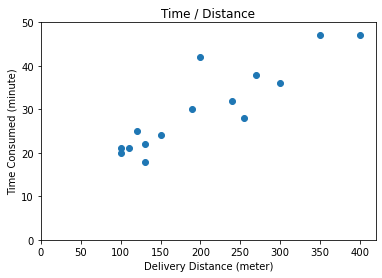

In [46]:
plt.scatter(data[:, 0], data[:, 1]) 
plt.title("Time / Distance")
plt.xlabel("Delivery Distance (meter)")
plt.ylabel("Time Consumed (minute)")
plt.axis([0, 420, 0, 50])
plt.show() 

### 거리가 늘어남에 따라 시간도 비슷한 속도로 늘어나는 것을 볼 수 있다.

In [9]:
#기울기 공식의 분모
divisor = sum([(mx - i) **2 for i in x])

In [10]:
#기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

In [11]:
print("분모: ", divisor)
print("분자: ", dividend)

분모:  128790.0
분자:  11887.000000000002


In [14]:
#기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx * a)

print("기울기 a = ", a)
print("y 절편 b = ", b)

기울기 a =  0.09229753862877554
y 절편 b =  11.330266325025232


In [35]:
x = np.array(x)
y = np.array(y)

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [39]:
model.predict([[500]])

array([57.47903564])

### 거리가 500m 일때 예상 배달 시간은 57분으로 나타난다.

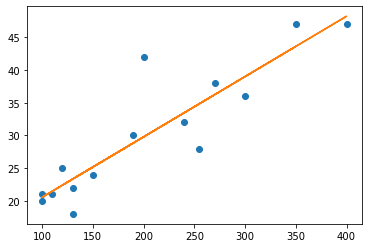

In [44]:
plt.plot(x, y, 'o')
plt.plot(x, model.predict(x.reshape(-1,1)))
plt.show()

### 거리에 따른 예측되는 배달 시간을 선으로 표시하여 그래프에 나타내었다.

## 2. 다중선형회귀 
### 실업률과 이자율을 통해 경제의 주가 지수 예측하기

In [64]:
import pandas as pd

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

print (df)

    Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price
0   2017     12           2.75                5.3               1464
1   2017     11           2.50                5.3               1394
2   2017     10           2.50                5.3               1357
3   2017      9           2.50                5.3               1293
4   2017      8           2.50                5.4               1256
5   2017      7           2.50                5.6               1254
6   2017      6           2.50                5.5               1234
7   2017      5           2.25                5.5               1195
8   2017      4           2.25                5.5               1159
9   2017      3           2.25                5.6               1167
10  2017      2           2.00                5.7               1130
11  2017      1           2.00                5.9               1075
12  2016     12           2.00                6.0               1047
13  2016     11           1.75    

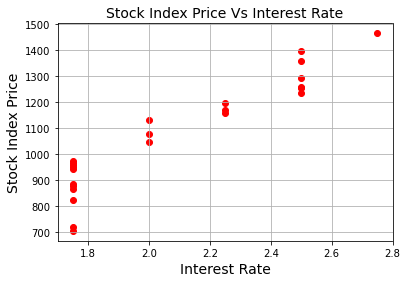

In [65]:
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

Stock_Index_Price와 Interest_Rate 사이에는 실제로 선형 관계가 존재한다는 것을 알 수 있다. 

특히, 금리가 오르면 주가지수도 상승한다.

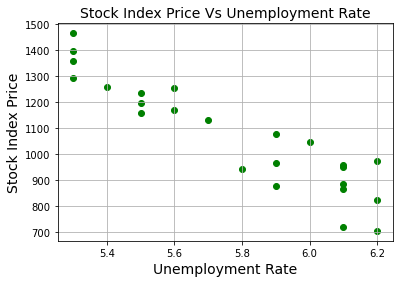

In [66]:
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

Stock_Index_Price와 Unemployment_Rate 사이에도 선형 관계가 존재한다. 

실업률이 올라가면 주가 지수 가격은 내려간다(여기서는 여전히 선형 관계이지만 음의 기울기를 가짐).

In [73]:
from sklearn import linear_model
import statsmodels.api as sm

X = df[['Interest_Rate','Unemployment_Rate']] 
Y = df['Stock_Index_Price']
 
# with sklearn
model = linear_model.LinearRegression()
model.fit(X, Y)

print('절편: ', model.intercept_)
print('기울기: ', model.coef_)

# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: ', model.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

절편:  1798.403977625855
기울기:  [ 345.54008701 -250.14657137]
Predicted Stock Index Price:  [1422.86238865]


## 3. 로지스틱회귀

### 공부시간을 통해 합격 여부 예측하기

epoch=0, 기울기=0.0848, 절편=0.0015
Error value:0.4166
epoch=1000, 기울기=0.6718, 절편=-0.2677
Error value:0.4617
epoch=2000, 기울기=-0.0122, 절편=-0.3896
Error value:0.3188
epoch=3000, 기울기=-0.1714, 절편=-0.4679
Error value:0.5042
epoch=4000, 기울기=-0.0225, 절편=-0.5047
Error value:0.3777
epoch=5000, 기울기=-0.4076, 절편=-0.5233
Error value:0.5166
epoch=6000, 기울기=-0.2040, 절편=-0.5318
Error value:0.5081
epoch=7000, 기울기=1.1734, 절편=-0.4984
Error value:0.4650
epoch=8000, 기울기=0.9214, 절편=-0.5217
Error value:0.4637
epoch=9000, 기울기=-0.1923, 절편=-0.5598
Error value:0.5075
epoch=10000, 기울기=-0.6465, 절편=-0.5583
Error value:0.5215


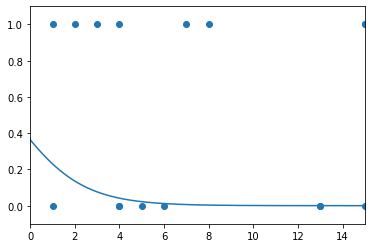

Input : 72.0, Real : 0.0, Expect: 0.0000
Input : 67.0, Real : 1.0, Expect: 0.0000
Input : 80.0, Real : 1.0, Expect: 0.0000
Input : 4.0, Real : 0.0, Expect: 0.0413
Input : 86.0, Real : 0.0, Expect: 0.0000
Input : 30.0, Real : 0.0, Expect: 0.0000
Input : 70.0, Real : 1.0, Expect: 0.0000
Input : 94.0, Real : 1.0, Expect: 0.0000
Input : 51.0, Real : 0.0, Expect: 0.0000
Input : 37.0, Real : 0.0, Expect: 0.0000


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

x = [random.randint(1,100) for i in range(100)] # 1부터 100까지의 공부시간을 x 데이터로 만든다.
y = [random.randint(0,1) for i in range(100)] # 합격여부

x_data = np.array(x)
y_data = np.array(y)

a = 0
b = 0
lr = 0.05
loss = []

def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

#경사 하강법
for i in range(10001):
    a_diff = (1/len(x_data))*sum(x_data*(sigmoid(a*x_data + b) - y_data)) 
    b_diff = (1/len(x_data))*sum(sigmoid(a*x_data + b) - y_data)
    a = a - lr * a_diff
    b = b - lr * b_diff
    y_hat = sigmoid(a * x_data + b)
    error = y_data - y_hat
    mse = (error ** 2).mean()
    loss.append(mse)
    if i % 1000 == 0:    
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        print("Error value:%.4f" % (mse))

#결과 출력
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) 
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

for i in range(x_data.shape[0]):
    if i % 10 == 0:
        print("Input : %.1f, Real : %.1f, Expect: %.4f" % (x_data[i], y_data[i], sigmoid(a * x_data[i] + b)))

In [94]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add( Dense(24, input_dim=2, activation='relu'))
model.add( Dense(10, activation='relu')) 
#예측함수의 범위를 넓혀줘서 선형회귀나 로지스틱에 부합하지 않을때도 정확도를 높여준다.
model.add( Dense(1, activation='sigmoid'))

model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=200, batch_size=6)

result = model.evaluate(X, Y)
print("\n<Model Evaluation>")
print("Accuracy: %.4f" % (result[1]))
print("Error: %.4f" % (result[0]))

print("\n<Expectation Test>")
output = model.predict( X )
print( output )

Epoch 1/200
1/1 [==============================] - 0s 286ms/step - loss: 0.8434 - accuracy: 0.6667
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 0.8334 - accuracy: 0.6667
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8236 - accuracy: 0.6667
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 0.8138 - accuracy: 0.6667
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8041 - accuracy: 0.6667
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 0.7947 - accuracy: 0.6667
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.7854 - accuracy: 0.6667
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.7777 - accuracy: 0.6667
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 0.7715 - accuracy: 0.6667
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.6667
Epoch 11/200
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6667
Epoch 85/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6667
Epoch 86/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6667
Epoch 87/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.6667
Epoch 88/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6667
Epoch 89/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6667
Epoch 90/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.6667
Epoch 91/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6220 - accuracy: 0.6667
Epoch 92/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.6667
Epoch 93/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6667
Epoch 94/200
1/1 [===============

Epoch 167/200
1/1 [==============================] - 0s 5ms/step - loss: 0.4999 - accuracy: 0.6667
Epoch 168/200
1/1 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.6667
Epoch 169/200
1/1 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.6667
Epoch 170/200
1/1 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.6667
Epoch 171/200
1/1 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.6667
Epoch 172/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.6667
Epoch 173/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.6667
Epoch 174/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.6667
Epoch 175/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.6667
Epoch 176/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.6667
Epoch 177/

라벨링을 직접 진행하지 않고 랜덤으로 합격 여부를 지정해서 낮은 정확도를 보인다.